In [ ]:
d = [{'a': 1, 'b': 2, 'c': 3},{'a': 11, 'b': 22, 'c': 33},{'a': 111, 'b': 222, 'c': 333}]
c = [[j_v for j_k,j_v in i if j_k == 'b'] for i in d ]
a = d['a']
a=4
print(d)
b = d
b['b'] = 4
print(d)

In [ ]:
import pandas as pd
import json

a = "[{\"WNACTemOut\":[{\"localtime\":1733677200000,\"value\":-2.3},{\"localtime\":1733680800000,\"value\":-3.1},{\"localtime\":1733684400000,\"value\":-2.5},{\"localtime\":1733688000000,\"value\":-2.2},{\"localtime\":1733691600000,\"value\":-2.2},{\"localtime\":1733695200000,\"value\":-2.2}]},{\"WNACWindSpeed\":[{\"localtime\":1733677200000,\"value\":1.4},{\"localtime\":1733680800000,\"value\":1.7},{\"localtime\":1733684400000,\"value\":2.2},{\"localtime\":1733688000000,\"value\":2.8},{\"localtime\":1733691600000,\"value\":2.8},{\"localtime\":1733695200000,\"value\":2.8}]}]"
result = json.loads(a)
print(result)
print(type(result[0]))
temp = pd.DataFrame(result)
print(temp)

In [ ]:
import pandas as pd

data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Age': [28, 34, 29, 32],
        'City': ['New York', 'Paris', 'Berlin', 'London']}
df = pd.DataFrame(data)
print(df)

data = [{'Name': 'John', 'Age': 28, 'City': 'New York'},
        {'Name': 'Anna', 'Age': 34, 'City': 'Paris'},
        {'Name': 'Peter', 'Age': 29, 'City': 'Berlin'},
        {'Name': 'Linda', 'Age': 32, 'City': 'London'}]
df = pd.DataFrame(data)
print(df)

import numpy as np

array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df = pd.DataFrame(array, columns=['A', 'B', 'C'])
print(df)

data = {'Name': pd.Series(['John', 'Anna', 'Peter', 'Linda']),
        'Age': pd.Series([28, 34, 29, 32])}
df = pd.DataFrame(data)
print(df)

dates = pd.date_range('20230101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

json_data = '{"Name":{"0":"John","1":"Anna","2":"Peter"},"Age":{"0":28,"1":34,"2":29}}'
df = pd.read_json(json_data)
print(df)


In [ ]:
import numpy as np
a = {"a":[{"b"}]}
print(a.keys())

b = pd.DataFrame()
b.loc[0,'a'] = 1
b.loc[1,'a'] = 2
b.loc[0, 'b'] = 3
b['c'] = pd.Series(dtype='int64')
# b.loc[1,'b'] = np.nan
print(b)
print(b.loc[1,'b'])
print(str(b.loc[1,'b'])=='nan')
# b.ffill(inplace=True)
print(b)
for index, i in b.iterrows():
    print(index)
    print(i['a'])

In [ ]:
import pytz
from datetime import datetime
#时间戳转本地时间
def timestamp_to_localtime(timestamp):
    # 指定时区（例如，'Asia/Shanghai'为中国标准时间）
    timezone = pytz.timezone('Asia/Shanghai')

    # 转换为指定时区的datetime对象
    dt_object = datetime.fromtimestamp(timestamp, tz=timezone)

    # 格式化输出
    formatted_time = dt_object.strftime("%Y-%m-%d %H:%M:%S %Z")
    return formatted_time

a = pd.to_datetime(1733688000000,unit = "ms",errors='coerce')

# a = timestamp_to_localtime(1733688000000/1000)

print(type(a))
print(a)
# print(pd.to_datetime(a, ))

In [ ]:
import requests
import json

Url_farm = "http://173.17.4.11:9100" + '/wind/farm/list' #Data_Url "http://173.17.4.11:9100"
head = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer '+ 'v6AREBCPzLpd4AqAz1WhAc5xryPqVMZW'
}

response = requests.post(Url_farm, headers=head)
print(response)
print(response.status_code)
print(json.loads(response.text))


In [ ]:
from flask import Flask, request, jsonify, Blueprint
import requests

app = Flask(__name__)

# api = Blueprint('api', __name__, url_prefix='/wind-algorithm-model')
MainIP = "173.17.4.82"#"127.0.0.1" . "173.17.4.11", #本算法应用部署的机子
MainPort = 5000 #8889
BackIP = "173.17.4.11" #后端java应用部署的机子
#智慧场站数据提取配置url
Data_Url = 'http://'+str(BackIP)+':'+str(9100)
token = 'v6AREBCPzLpd4AqAz1WhAc5xryPqVMZW'


@app.route('/job/execute', methods=['POST'])
def execute():
    # 获取客户端发送的数据
    data = request.json

    # 设置目标 API 的 URL
    target_url = Data_Url + '/wind/farm/list' #"https://api.example.com/some/endpoint"

    # 设置请求头（如果需要）
    head = {
        'Content-Type': 'application/json',
        'Authorization': 'Bearer '+ 'v6AREBCPzLpd4AqAz1WhAc5xryPqVMZW'
    }

    try:
        # # 发送 POST 请求到目标 API
        # response = requests.post(target_url, headers=head)

        # print(response)
        # # 检查响应状态
        # response.raise_for_status()

        # # 返回目标 API 的响应给客户端
        # return jsonify(response.json()), response.status_code
        print(1)

    except requests.RequestException as e:
        # 处理请求异常
        print(jsonify({"error": str(e)}))
        return jsonify({"error": str(e)}), 500

# app.register_blueprint(api)

if __name__ == '__main__':
    # app.run(MainIP, MainPort, debug=True)
    app.run("127.0.0.1", port=8889)


In [ ]:
from flask import Flask

app = Flask(__name__)
MainIP = "173.17.4.82"#"127.0.0.1" . "173.17.4.11", #本算法应用部署的机子
MainPort = 5000 #8889

@app.route('/')
def index_hello():
    return "你好，我是首页"


if __name__ == '__main__':
    app.run(MainIP, MainPort, debug=True)

In [ ]:
from flask import Flask

app = Flask(__name__)

MainIP = "173.17.4.82"#"127.0.0.1" . "173.17.4.11", #本算法应用部署的机子
MainPort = 5000 #8889
BackIP = "173.17.4.11" #后端java应用部署的机子
#智慧场站数据提取配置url
Data_Url = 'http://'+str(BackIP)+':'+str(9100)
token = 'v6AREBCPzLpd4AqAz1WhAc5xryPqVMZW'
@app.route('/')
def index():
    return "你好，我是首页"


@app.route('/get_type', methods=['GET'])
def get_type():
    # 设置目标 API 的 URL
    target_url = Data_Url + '/wind/farm/list' #"https://api.example.com/some/endpoint"

    # 设置请求头（如果需要）
    head = {
        'Content-Type': 'application/json',
        'Authorization': 'Bearer '+ 'v6AREBCPzLpd4AqAz1WhAc5xryPqVMZW'
    }
    # 发送 POST 请求到目标 API
    response = requests.post(target_url, headers=head)

    print(response.text)
    # 检查响应状态
    response.raise_for_status()

    # 返回目标 API 的响应给客户端
    # return jsonify(response.json()), response.status_code
    return {"b":"语文", 'a':"数学"}


if __name__ == '__main__':
    app.run("173.17.4.82", port=8890)

In [ ]:
from urllib.parse import urlparse, parse_qs
import os
 
# url = 'http://www.example.com/path?key=value&key2=value2'
url = 'http://173.17.4.12:9000/wind-efficiency-pictures/1735021042_814917/4%23%E9%A3%8E%E5%90%91%E7%8E%AB%E7%91%B0%E5%9B%BE.png'
 
# 解析URL
parsed_url = urlparse(url)
 
# 打印不同组成部分
# print('scheme:', parsed_url.scheme)
# print('netloc:', parsed_url.netloc)
# print('path:', parsed_url.path)
# print('query:', parsed_url.query)
pathList =parsed_url.path.split('/')
 
# # 解析查询参数
# query_params = parse_qs(parsed_url.query)
# print('query params:', query_params)
# print(parsed_url.path.split('/'))
print("minioUrl: "+parsed_url.path)
print("bucket_name: "+pathList[1])
print("file_name: "+os.path.join(pathList[2],pathList[3]))


In [ ]:
import matplotlib.pyplot as plt
 
# 绘制数据
plt.plot([1, 2, 3], label='Line 1')
plt.plot([1.5, 2.5, 3.5], label='Line 2')
 
# 添加图例并设置背景色为透明
plt.legend(framealpha=0)
 
plt.savefig("images.png", transparent=True)
# 显示图形
plt.show()

In [ ]:
a = "03#, 10#"
print("," in a)


In [ ]:
params = {
	"farm": [{
		"turbineType": [{
			"name": "MySE5.0-200",
			"wtid": [{
				"name": "#07"
			}, {
				"name": "#01"
			}, {
				"name": "#03"
			}, {
				"name": "#04"
			}, {
				"name": "#08"
			}, {
				"name": "#02"
			}, {
				"name": "#09"
			}]
		}]
	}],
	"target": {
		"endDate": "2024-11-29",
		"startDate": "2024-11-19"
	}
}
if "," in ['wtid'][-1]:#字符串型风机号 "03#,10#"
    wtid = params['farm'][-1]['turbineType'][-1]['wtid'][-1].replace(" ", "").split(',')
else:
    if len(params['farm'][-1]['turbineType'][-1]['wtid']) > 0:
        if isinstance(params['farm'][-1]['turbineType'][-1]['wtid'], str):#列表型风机号["03#","10#"]
            wtid = params['farm'][-1]['turbineType'][-1]['wtid']
        else:#列表型风机号[{"name":"03#"},{"name":"10#"}]
            wtid = []
            for elem in params['farm'][-1]['turbineType'][-1]['wtid']:
                wtid.append(elem["name"]) #params['farm'][-1]['turbineType'][-1]['wtid']
    else:
        wtid = []

print(wtid)

In [2]:
import pandas as pd
import multiprocessing as mp
from functools import partial
from multiTask import parallel_fill_data, process_dataframe
import multiTask 

# def process_dataframe(df, result):
#     # 创建一个结果的副本，以避免并发写入问题
#     local_result = result.copy()
    
#     # 使用 pandas 的向量化操作来更新非空值
#     mask = df.notna()
#     local_result.update(df.where(mask))
    
#     return local_result

# def parallel_fill_data(df_list, result, num_processes=None):
#     if num_processes is None:
#         num_processes = mp.cpu_count()

#     # 创建一个进程池
#     with mp.Pool(processes=num_processes) as pool:
#         # 使用偏函数来固定 result 参数
#         process_func = partial(process_dataframe, result=result)
        
#         # 使用 map 来并行处理每个数据框
#         results = pool.map_async(process_func, df_list)
#         pool.close()
#         pool.join()

#     # 合并所有结果
#     for res in results.get():
#         result.update(res)

#     return result

# 使用示例
if __name__ == "__main__":
    # 创建示例数据
    df1 = pd.DataFrame({'A': [1, None, 3], 'B': [None, 2, None]})
    df2 = pd.DataFrame({'A': [None, 2, None], 'C': [1, None, 3]})
    df3 = pd.DataFrame({'A': [4, None], 'B': [None, 5]})

    df_list = [df1, df2, df3]
    
    # 创建一个空的结果数据框
    # result = pd.DataFrame(index=df1.index, columns=df1.columns)
    all_index = set()
    all_columns = set()
    for df in df_list:
        all_index.update(df.index)
        all_columns.update(df.columns)
    
    # 创建一个空的DataFrame，包含所有可能的行和列
    result = pd.DataFrame(index=sorted(all_index), columns=sorted(all_columns))

    # 并行处理
    result = parallel_fill_data(df_list, result)

    print(result)


     A    B    C
0  4.0  NaN  1.0
1  2.0  5.0  NaN
2  3.0  NaN  3.0


In [1]:
import pandas as pd
import multiprocessing as mp
from functools import partial
from multiTask import parallel_fill_data, process_dataframe
import multiTask 

# def process_dataframe(df, result):
#     # 创建一个结果的副本，以避免并发写入问题
#     local_result = result.copy()
    
#     # 使用 pandas 的向量化操作来更新非空值
#     mask = df.notna()
#     local_result.update(df.where(mask))
    
#     return local_result

# def parallel_fill_data(df_list, result, num_processes=None):
#     if num_processes is None:
#         num_processes = mp.cpu_count()

#     # 创建一个进程池
#     with mp.Pool(processes=num_processes) as pool:
#         # 使用偏函数来固定 result 参数
#         process_func = partial(process_dataframe, result=result)
        
#         # 使用 map 来并行处理每个数据框
#         results = pool.map_async(process_func, df_list)
#         pool.close()
#         pool.join()

#     # 合并所有结果
#     for res in results.get():
#         result.update(res)

#     return result

# 使用示例
if __name__ == "__main__":
    # 创建示例数据
    df1 = pd.DataFrame({'A': [1, None, 3], 'B': [None, 2, None]})
    df2 = pd.DataFrame({'A': [None, 2, None], 'C': [1, None, 3]})
    df3 = pd.DataFrame({'A': [4, None], 'B': [None, 5]})

    df_list = [df1, df2, df3]
    
    # 创建一个空的结果数据框
    # result = pd.DataFrame(index=df1.index, columns=df1.columns)
    all_index = set()
    all_columns = set()
    for df in df_list:
        all_index.update(df.index)
        all_columns.update(df.columns)
    
    # 创建一个空的DataFrame，包含所有可能的行和列
    result = pd.DataFrame(index=sorted(all_index), columns=sorted(all_columns))

    # 创建一个结果的副本，以避免并发写入问题
    for df in df_list:
        local_result = pd.DataFrame(index=sorted(all_index), columns=sorted(all_columns))
    
        # 使用 pandas 的向量化操作来更新非空值
        mask = df.notna()
        local_result.update(df.where(mask))
        result.update(local_result)
    
    # return local_result 

    print(result)


     A    B    C
0  4.0  NaN  1.0
1  2.0  5.0  NaN
2  3.0  NaN  3.0


In [ ]:
from multiprocessing import Pool
 
# 工作函数，接受一个迭代器并对其中的每个元素执行操作
def process_items(items):
    for item in items:
        # 这里放置你想要对每个item执行的代码
        print(item)  # 示例：简单地打印每个item
 
# 假设有三个不同的数据集
data1 = range(10)
data2 = range(10, 20)
data3 = range(20, 30)
 
# 创建进程池
with Pool(processes=3) as pool:
    # 并行执行三个for循环
    pool.map(process_items, [data1, data2, data3])

In [ ]:
from multiprocessing import Pool

def add(a: int, b: int):
    print(a + b)


if __name__ == '__main__':
    pool = Pool(2)  # 两个进程执行
    # pool = multiprocessing.Pool(multiprocessing.cpu_count()) # 全部cpu执行
    for i in range(300):
        pool.apply_async(func=add ,args=(i, i + 1))
    pool.close()
    pool.join()

In [ ]:
import multiprocessing
def calculate_square(num):
    return num*num
# if __name__ == '__main__':
pool = multiprocessing.Pool()
for i in range(1,101):
    pool.apply_async(calculate_square, args=(i,))
pool.close()
pool.join()
pool.terminate()

In [ ]:
from multiTask import process_task
if __name__ == "__main__":
    numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    # with multiprocessing.Pool(processes=4) as pool:
        # pool.map(process_task, numbers)
    pool = multiprocessing.Pool()
    result = pool.map_async(process_task, numbers)
    pool.close()
    pool.join()
    print(result.get())
        

In [2]:
import platform
 
def get_os():
    system = platform.system()
    if system == 'Windows':
        return 'win'
    elif system == 'Darwin':
        return 'mac'
    elif system == 'Linux':
        return 'linux'
    else:
        return 'unknown'
 
os_type = get_os()
print(f"The operating system is: {os_type}")

The operating system is: mac


In [5]:
# 定义两个函数，分别用于处理单个元素
def square(x):
    return x * x
 
def cube(x):
    return x * x * x
 
# 创建一个迭代器，包含数字1到5
numbers = [1, 2, 3, 4, 5]
 
# 外层的 map 函数
mapped_numbers = map(lambda x: map(lambda y: y(x), [square, cube]), numbers)
 
print(mapped_numbers)
print(list(mapped_numbers))
# 将内层的 map 函数的返回值映射到列表
result = list(map(list, mapped_numbers))
 
print(result)  # 输出: [[1, 1], [4, 8], [9, 27], [16, 64], [25, 125]]

[<map object at 0x12f768610>, <map object at 0x12f768760>, <map object at 0x12f768be0>, <map object at 0x12f6e56d0>, <map object at 0x105c290a0>]
[]


In [6]:
a = 'wT'
print(a.upper())

WT


In [2]:
import pickle
import gzip
import pandas as pd

with open('Efficiency_ana_V3.pkl.gz', 'rb') as f:
    algorithms_configs = pickle.loads(gzip.decompress(f.read()))
algorithms_configs['Df_all_all'].to_csv('stop.csv', index=True)

ValueError: <function viridis at 0x10fa074c0> is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

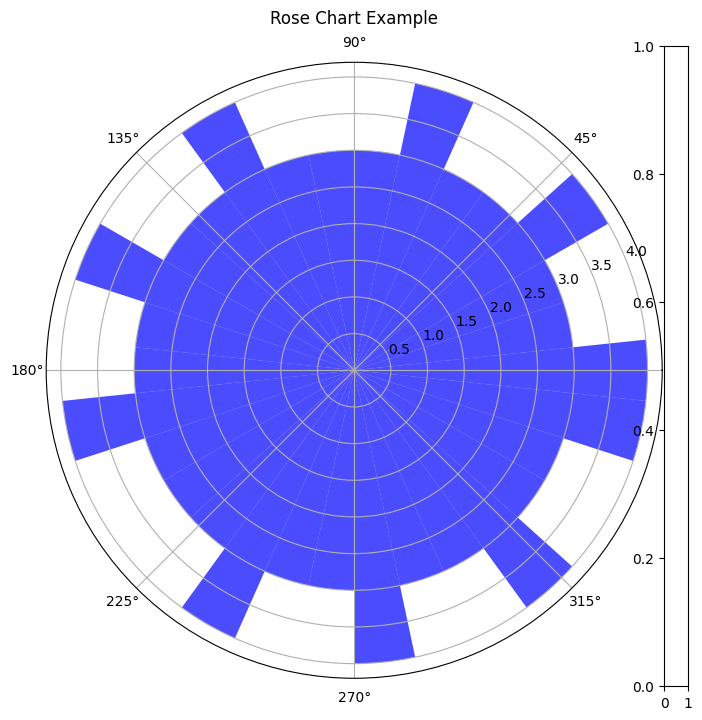

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colorbar as colorbar

# 生成示例数据
# 角度（0到360度）
angles = np.linspace(0, 2 * np.pi, 100)

# 模拟的风速数据
radii = np.random.rand(100) * 10  # 随机生成的风速

# 创建玫瑰图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# 使用 histogram 计算每个方向的频率
n, bins = np.histogram(np.degrees(angles), bins=30)  # 30个方向
width = np.deg2rad(360 / 30)  # 每个方向的宽度

# 绘制玫瑰图
bars = ax.bar(bins[:-1] * np.pi / 180, n, width=width, color='blue', alpha=0.7)

# 设置标题
ax.set_title("Rose Chart Example", va='bottom')

# 创建颜色条
norm = mcolors.Normalize(vmin=0, vmax=np.max(n))  # 归一化
cmap = plt.viridis  # 选择颜色映射
cbar_ax = fig.add_axes([0.9, 0.1, 0.03, 0.8])  #颜色条的位置
cbar = colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')

# 设置颜色条的刻度和标签
cbar.set_ticks([0, np.max(n) / 2, np.max(n)])  # 设置刻度位置
cbar.set_ticklabels(['Low', 'Medium', 'High'])  # 设置刻度标签

# 设置刻度颜色
cbar.ax.tick_params(labelcolor='red')  #设置刻度标签颜色为红色
cbar.ax.yaxis.set_tick_params(color='green')  # 设置刻度线颜色为绿色

# 设置颜色条标签及其颜色
cbar.set_label('Frequency', color='black')  #设置标签颜色为黑色

# 显示图形
plt.show()

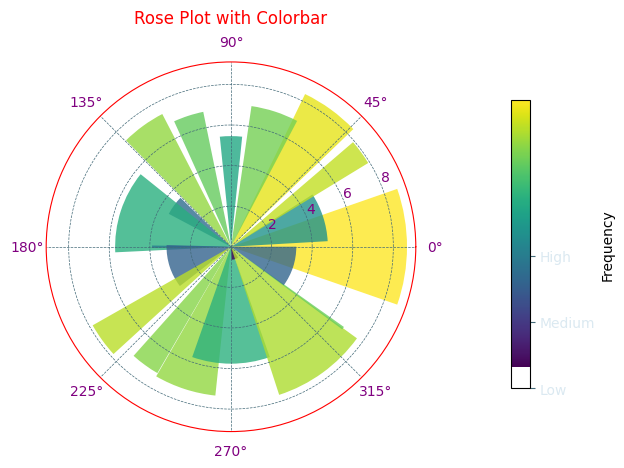

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

# 生成数据
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

# 创建颜色映射
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=radii.min(), vmax=radii.max())

# 创建图形和极坐标子图
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))

# 绘制玫瑰图
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# 设置每个条形的颜色
for r, bar in zip(radii, bars):
    bar.set_facecolor(cmap(norm(r)))
    bar.set_alpha(0.8)
# 设置经纬线颜色
ax.xaxis.grid(color='#426977', linestyle='--', linewidth=0.5)  # 设置极坐标的径向网格线颜色
ax.yaxis.grid(color='#426977', linestyle='--', linewidth=0.5)  # 设置极坐标的圆周网格线颜色
ax.spines['polar'].set_color('red')
# 设置刻度颜色
ax.tick_params(axis='x', colors='purple')  # 设置角度刻度颜色
ax.tick_params(axis='y', colors='purple')  # 设置半径刻度颜色

# 添加颜色条
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar_ax = fig.add_axes([0.95, 0.2, 0.03, 0.6])
cbar = ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='vertical')

# # 设置颜色条刻度的颜色
# cbar.ax.yaxis.set_tick_params(color='white')
# plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')
# 设置颜色条的刻度和标签
cbar.set_ticks([0, np.max(n) / 2, np.max(n)])  # 设置刻度位置
cbar.set_ticklabels(['Low', 'Medium', 'High'])  # 设置刻度标签

# 设置刻度颜色
cbar.ax.tick_params(labelcolor='#DBE9F1')  #设置刻度标签颜色为红色
cbar.ax.yaxis.set_tick_params(color='#426977')  # 设置刻度线颜色为绿色

# 设置颜色条标签及其颜色
cbar.set_label('Frequency', color='black')  #设置标签颜色为黑色

# 设置标题
ax.set_title("Rose Plot with Colorbar", va='bottom', color='red')

plt.show()


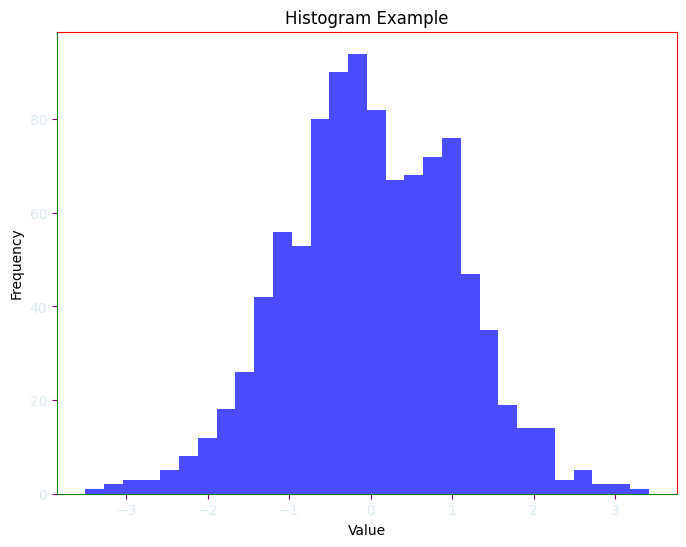

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
data = np.random.randn(1000)  # 生成1000个随机数

# 创建直方图
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(data, bins=30, color='blue', alpha=0.7)

# 设置标题和标签
ax.set_title("Histogram Example")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

# 设置坐标轴边框颜色
ax.spines['top'].set_color('red')    # 设置上边框颜色
ax.spines['right'].set_color('red')  # 设置右边框颜色
ax.spines['left'].set_color('green')  # 设置左边框颜色
ax.spines['bottom'].set_color('green')  # 设置下边框颜色

# 设置刻度颜色
ax.tick_params(axis='x', colors='purple')  # 设置x轴刻度颜色
ax.tick_params(axis='y', colors='purple')  # 设置y轴刻度颜色
# 设置刻度值颜色
for label in ax.get_xticklabels():
    label.set_color('#DBE9F1')  # 设置x轴刻度值颜色为橙色

for label in ax.get_yticklabels():
    label.set_color('#DBE9F1')  # 设置y轴刻度值颜色为橙色



# 显示图形
plt.show()


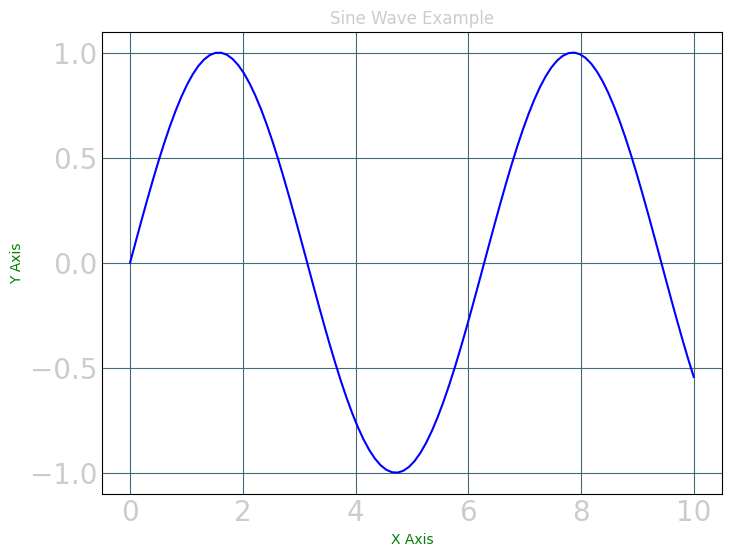

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 创建图形
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Sine Wave Example', color='#ccc') 
# 绘制曲线
ax.plot(x, y, label='Sine Wave', color='blue')

# 设置标题和标签
# ax.set_title("Sine Wave Example", color='darkblue')  # 设置标题颜色
ax.set_xlabel("X Axis", color='green')  # 设置x轴标签颜色
ax.set_ylabel("Y Axis", color='green')  # 设置y轴标签颜色

# # 设置刻度标签颜色
# ax.tick_params(axis='x', colors='purple')  # 设置x轴刻度标签颜色
# ax.tick_params(axis='y', colors='purple')  # 设置y轴刻度标签颜色
# ax.grid()
# # 设置经纬线颜色
# ax.xaxis.grid(color='#426977', linestyle='--', linewidth=0.5)  # 设置极坐标的径向网格线颜色
# ax.yaxis.grid(color='#426977', linestyle='--', linewidth=0.5)  # 设置极坐标的圆
# # 设置图例
# legend = ax.legend()
# for text in legend.get_texts():
#     text.set_color('orange')  # 设置图例标签颜色
plt.tick_params(which='both',labelcolor='#ccc', width=0,color='#426977', labelsize=20,gridOn=True,grid_color='#426977',direction ='in',right=True)

# 显示图形
plt.show()


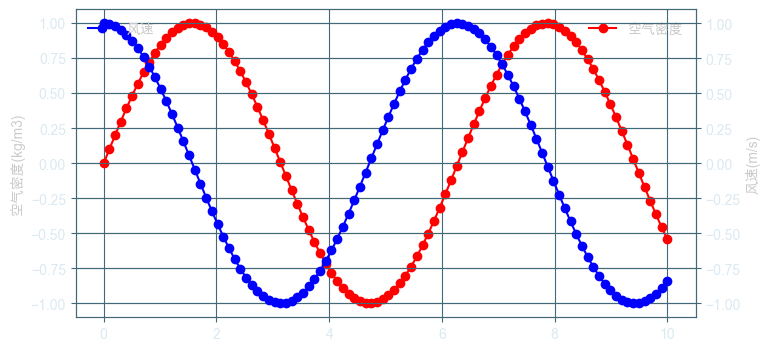

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #mac
x = np.linspace(0, 10, 100)
y = np.sin(x)
y1 = np.cos(x)
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax.plot(x,y,'o-',color='r',label='空气密度')
ax.set_ylabel('空气密度(kg/m3)', color='#ccc')

ax1 = ax.twinx()
ax1.plot(x,y1,'o-',color='b',label='风速')
ax1.set_ylabel('风速(m/s)', color='#ccc')

ax.grid()

# 设置刻度颜色
ax.tick_params(axis='x', colors='#426977')  # 设置角度刻度颜色
ax.tick_params(axis='y', colors='#426977')  # 设置半径刻度颜色
ax1.tick_params(axis='x', colors='#426977')  # 设置角度刻度颜色
ax1.tick_params(axis='y', colors='#426977')  # 设置半径刻度颜色
# 设置刻度值颜色
for label in ax.get_xticklabels():
    label.set_color('#DBE9F1')  # 设置x轴刻度值颜色为橙色

for label in ax.get_yticklabels():
    label.set_color('#DBE9F1')  # 设置y轴刻度值颜色为橙色
for label in ax1.get_xticklabels():
        label.set_color('#DBE9F1')  # 设置x轴刻度值颜色为橙色

for label in ax1.get_yticklabels():
    label.set_color('#DBE9F1')  # 设置y轴刻度值颜色为橙色
# 设置坐标轴边框颜色
ax.spines['top'].set_color('#426977')    # 设置上边框颜色
ax.spines['right'].set_color('#426977')  # 设置右边框颜色
ax.spines['left'].set_color('#426977')  # 设置左边框颜色
ax.spines['bottom'].set_color('#426977')  # 设置下边框颜色
ax1.spines['top'].set_color('#426977')    # 设置上边框颜色
ax1.spines['right'].set_color('#426977')  # 设置右边框颜色
ax1.spines['left'].set_color('#426977')  # 设置左边框颜色
ax1.spines['bottom'].set_color('#426977')  # 设置下边框颜色
# 设置经纬线颜色
ax.xaxis.grid(color='#426977')
ax.yaxis.grid(color='#426977')
ax1.xaxis.grid(color='#426977')
ax1.yaxis.grid(color='#426977')
# 设置图例
legend = ax.legend(loc=1, framealpha=0)#,bbox_to_anchor=(0.8, 1)
for text in legend.get_texts():
    text.set_color('#ccc')  # 设置图例标签颜色
legend = ax1.legend(loc=2, framealpha=0)#,bbox_to_anchor=(0.8, 1)
for text in legend.get_texts():
    text.set_color('#ccc')  # 设置图例标签颜色


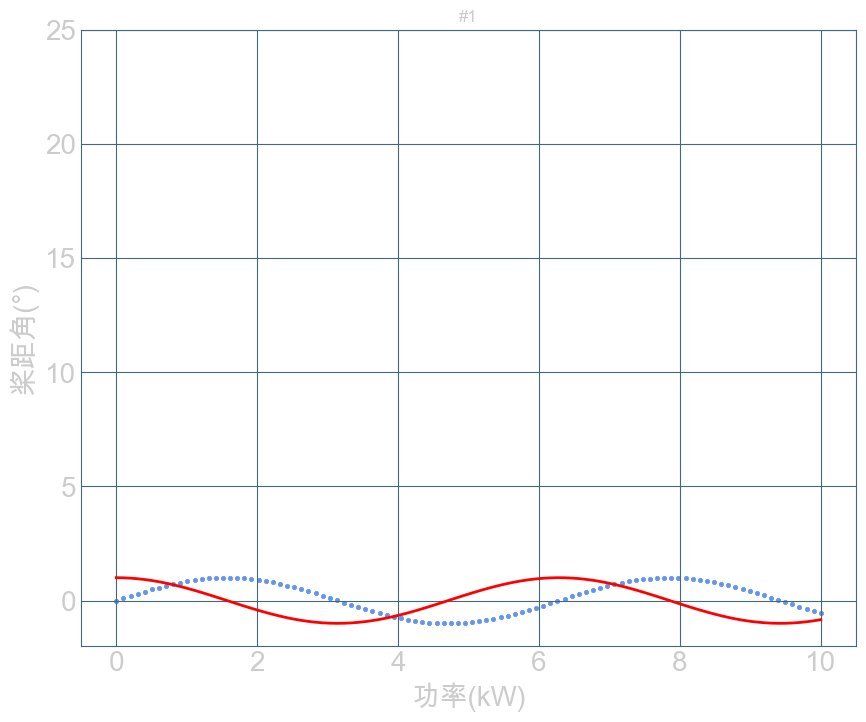

In [19]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #mac
x = np.linspace(0, 10, 100)
y = np.sin(x)
y1 = np.cos(x)
fig = plt.figure(figsize=(10,8),dpi=100)  
plt.title(str('#1'), color='#ccc')    
with plt.style.context('ggplot'):  
    #plt.plot(biaozhun['wspd'],biaozhun['pwrat'],color='red')          
    plt.scatter(x,y,color='cornflowerblue',s=10,alpha=1)
    plt.plot(x,y1,color='red',linewidth=2)
    plt.grid()
    plt.ylim(-2,25)
    plt.xlabel('功率(kW)',fontsize=20, color='#ccc')
    plt.ylabel('桨距角(°)',fontsize=20, color='#ccc')
    plt.tick_params(which='both',labelcolor='#ccc', width=0,color='#426977', labelsize=20,gridOn=True,grid_color='#426977',direction ='in',right=True)
    plt.gca().spines["left"].set_color('#426977')
    plt.gca().spines["bottom"].set_color('#426977')
    plt.gca().spines["right"].set_color('#426977')
    plt.gca().spines["top"].set_color('#426977')

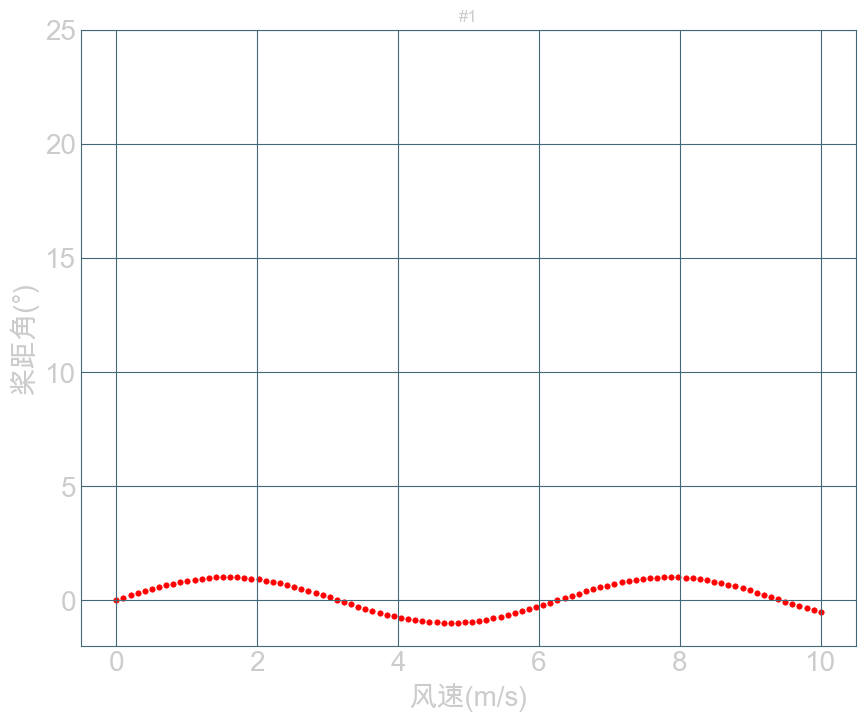

In [28]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #mac
x = np.linspace(0, 10, 100)
y = np.sin(x)
y1 = np.cos(x)
fig = plt.figure(figsize=(10,8),dpi=100)  
plt.title(str('#1'), color='#ccc')    
with plt.style.context('ggplot'):  
    plt.scatter(x,y,color='red',s=15)
    plt.grid()
    plt.ylim(-2,25)
    plt.xlabel('风速(m/s)',fontsize=20, color='#ccc')
    plt.ylabel('桨距角(°)',fontsize=20, color='#ccc')
    plt.tick_params(which='both',labelcolor='#ccc', width=0,color='#426977', labelsize=20,gridOn=True,grid_color='#426977',direction ='in',right=True)
    plt.gca().spines["left"].set_color('#426977')
    plt.gca().spines["bottom"].set_color('#426977')
    plt.gca().spines["right"].set_color('#426977')
    plt.gca().spines["top"].set_color('#426977')

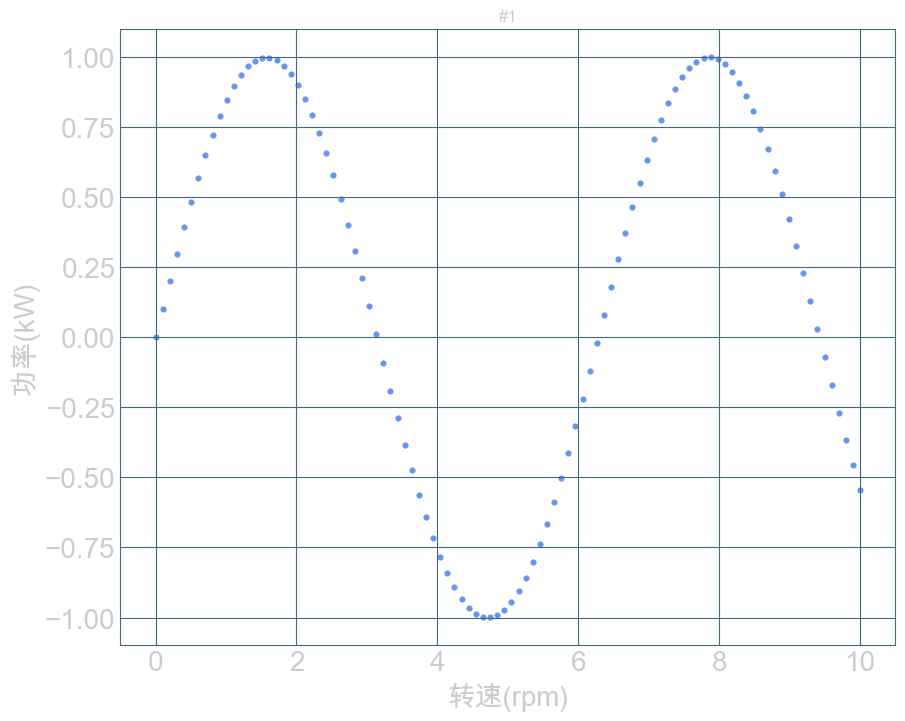

In [22]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #mac
x = np.linspace(0, 10, 100)
y = np.sin(x)
y1 = np.cos(x)
fig = plt.figure(figsize=(10,8),dpi=100)  
plt.title(str('#1'), color='#ccc')    
with plt.style.context('ggplot'):  
    plt.scatter(x,y,c='cornflowerblue',s=15)
    plt.grid()
    #plt.ylim(-3,25)
    plt.xlabel('转速(rpm)',fontsize=20, color='#ccc')
    plt.ylabel('功率(kW)',fontsize=20, color='#ccc')
    plt.tick_params(which='both',labelcolor='#ccc', width=0,color='#426977', labelsize=20,gridOn=True,grid_color='#426977',direction ='in',right=True)
    plt.gca().spines["left"].set_color('#426977')
    plt.gca().spines["bottom"].set_color('#426977')
    plt.gca().spines["right"].set_color('#426977')
    plt.gca().spines["top"].set_color('#426977')

(-40.0, 40.0)

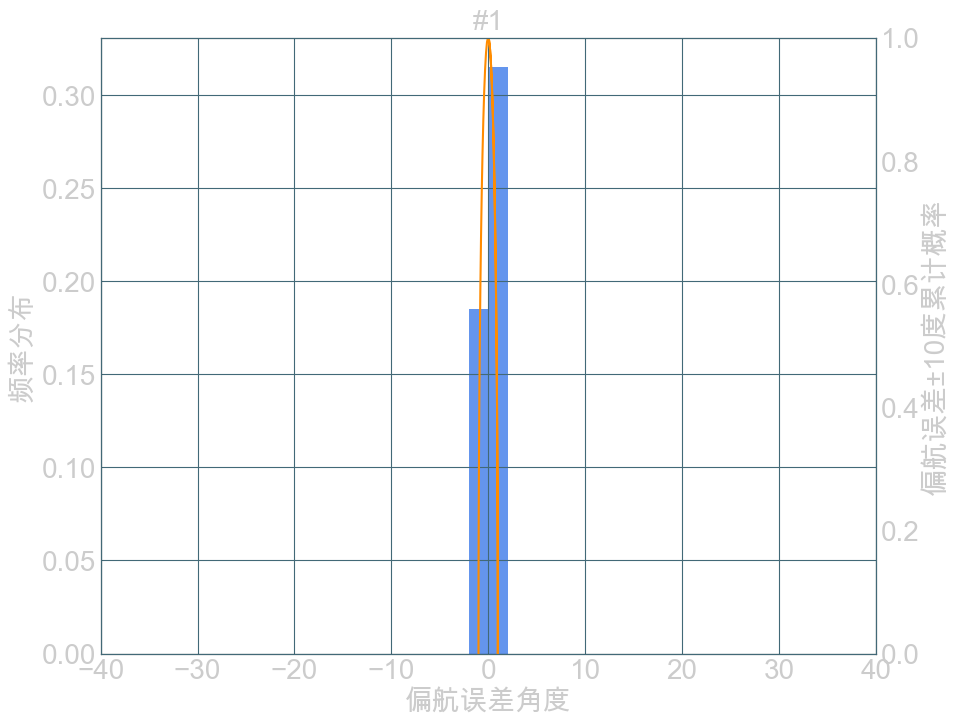

In [24]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #mac
x = np.linspace(0, 10, 100)
y = np.sin(x)
y1 = np.cos(x)
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.title(str('#1'),fontsize=20,color='#ccc') 
# wdir_temp = df_all_clear[np.abs(df_all_clear['wdir0','nanmean']<=40)]
#wdir_temp['wdir0','nanmean'].plot(kind = 'kde',label = '密度图',color='black')
ax.hist(y,bins=40,alpha=1,density=True,cumulative=False,histtype='bar',color='cornflowerblue',range = (-40,40))
ax.set_xlabel('偏航误差角度',fontsize=20, color='#ccc')
ax.set_ylabel('频率分布',fontsize=20, color='#ccc')
ax.tick_params(which='both',labelcolor='#ccc', width=0,color='#426977', labelsize=20,gridOn=True,grid_color='#426977',direction ='in',right=True)
ax1 = ax.twinx()
ax1.plot(y,y1,'-',color='darkorange',markersize=3,linewidth=1.5)
ax1.set_ylabel('偏航误差±10度累计概率',fontsize=20, color='#ccc')
ax1.tick_params(which='both',labelcolor='#ccc', width=0,color='#426977', labelsize=20,gridOn=False,grid_color='#426977',direction ='in',right=True)
ax1.set_ylim(0,1)
plt.gca().spines["left"].set_color('#426977')
plt.gca().spines["bottom"].set_color('#426977')
plt.gca().spines["right"].set_color('#426977')
plt.gca().spines["top"].set_color('#426977')
plt.gca().set_xlim(-40,40)

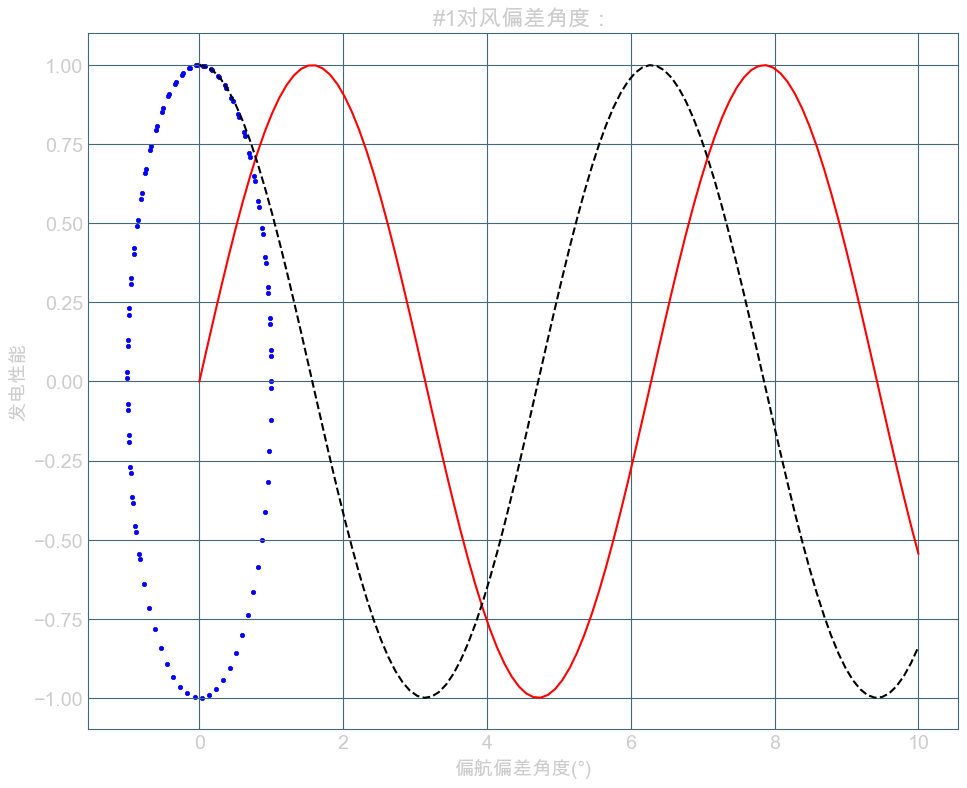

In [27]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #mac
x = np.linspace(0, 10, 100)
y = np.sin(x)
y1 = np.cos(x)
fig = plt.figure(figsize=(10,8),dpi=100)
plt.subplot(1,1,1)    
plt.title(str('#1')+'对风偏差角度：',fontsize=16, color='#ccc')
with plt.style.context('ggplot'):            
    plt.scatter(y1,y,color='blue',s=10)
    #plt.scatter(yaw_err_temp['wdir0cut1'],yaw_err_temp['pwrat','post'],color='red',s=20)
    #color使用标准色条，c使用变量赋值
    plt.plot(x,y,color='red')
    #plt.plot(dirbin,yfit1,color='green')
    plt.plot(x,y1,'--',color='black')
    #plt.plot(np.full((len(aa),1),dirbin[np.argmax(yfit1)]),yaw_err_minmax['pwrat_scaler'],'--',color='green')
    plt.grid()
    plt.xlabel('偏航偏差角度(°)',fontsize=14, color='#ccc')
    plt.ylabel('发电性能',fontsize=14, color='#ccc')
    plt.tick_params(which='both',labelcolor='#ccc', width=0,color='#426977', labelsize=14,gridOn=True,grid_color='#426977',direction ='in',right=True)
    #plt.text(0,min(train_minmax),str('%.1f' %windbin2[i]+'m/s'))
    #plt.colorbar()
    # 设置坐标轴边框颜色
    plt.gca().spines['top'].set_color('#426977')    # 设置上边框颜色
    plt.gca().spines['right'].set_color('#426977')  # 设置右边框颜色
    plt.gca().spines['left'].set_color('#426977')  # 设置左边框颜色
    plt.gca().spines['bottom'].set_color('#426977')  # 设置下边框颜色
plt.subplots_adjust(top=0.95,bottom=0.08,left=0.08,right=0.95,hspace =0.10, wspace =0.1) #调整边距   

ax.set_xlabel(xlabel='风速(m/s)',fontsize=10, color='#ccc')
ax.set_ylabel('风频',fontsize=10, color='#ccc')
ax.tick_params(labelsize=10)  


# 设置刻度颜色
ax.tick_params(axis='x', colors='#426977')  # 设置角度刻度颜色
ax.tick_params(axis='y', colors='#426977')  # 设置半径刻度颜色
# 设置刻度值颜色
for label in ax.get_xticklabels():
    label.set_color('#DBE9F1')  # 设置x轴刻度值颜色为橙色

for label in ax.get_yticklabels():
    label.set_color('#DBE9F1')  # 设置y轴刻度值颜色为橙色

plt.tick_params(which='both',labelcolor='#ccc', width=0,color='#426977', labelsize=20,gridOn=True,grid_color='#426977',direction ='in',right=True)


# 设置坐标轴边框颜色
ax.spines['top'].set_color('#426977')    # 设置上边框颜色
ax.spines['right'].set_color('#426977')  # 设置右边框颜色
ax.spines['left'].set_color('#426977')  # 设置左边框颜色
ax.spines['bottom'].set_color('#426977')  # 设置下边框颜色

# 设置图例
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('#ccc')  # 设置图例标签颜色

# 设置经纬线颜色
ax.xaxis.grid(color='#426977', linestyle='--', linewidth=0.5)  # 设置极坐标的径向网格线颜色
ax.yaxis.grid(color='#426977', linestyle='--', linewidth=0.5)  # 设置极坐标的圆

# 设置标题
ax.set_title("Rose Plot with Colorbar", va='bottom', color='red')

In [1]:
import time
funStartTime = time.time()
time.sleep(3)
print(f'###########################执行一次getWindFarmIntel时间{time.time()-funStartTime}###################')

###########################执行一次getWindFarmIntel时间3.0055410861968994###################
